Diabetes Prediction


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
import warnings



**Reading the Dataset**

In [3]:
df=pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


# New Section

In [ ]:
df.shape

(70692, 22)

In [ ]:
df.info

<bound method DataFrame.info of        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                  0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1                  0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2                  0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3                  0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4                  0.0     0.0       0.0        1.0  29.0     1.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
70687              1.0     0.0       1.0        1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0        1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0        1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  

**Removing Null Values**

In [ ]:
df.isnull().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [ ]:
df.isnull().sum()


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df['PhysActivity'].fillna(df['PhysActivity'].median(),inplace =True)
df['Fruits'].fillna(df['Fruits'].median(),inplace =True)
df['Veggies'].fillna(df['Veggies'].median(),inplace =True)
df['HvyAlcoholConsump'].fillna(df['HvyAlcoholConsump'].median(),inplace =True)
df['AnyHealthcare'].fillna(df['AnyHealthcare'].median(),inplace =True)
df['NoDocbcCost'].fillna(df['NoDocbcCost'].median(),inplace =True)
df['GenHlth'].fillna(df['GenHlth'].median(),inplace =True)
df['MentHlth'].fillna(df['MentHlth'].median(),inplace =True)
df['PhysHlth'].fillna(df['PhysHlth'].median(),inplace =True)
df['DiffWalk'].fillna(df['DiffWalk'].median(),inplace =True)
df['Sex'].fillna(df['Sex'].median(),inplace =True)
df['Age'].fillna(df['Age'].median(),inplace =True)
df['Education'].fillna(df['Education'].median(),inplace =True)
df['Income'].fillna(df['Income'].median(),inplace =True)

In [ ]:
df.describe()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


**Checking for Outliers**

<Axes: >

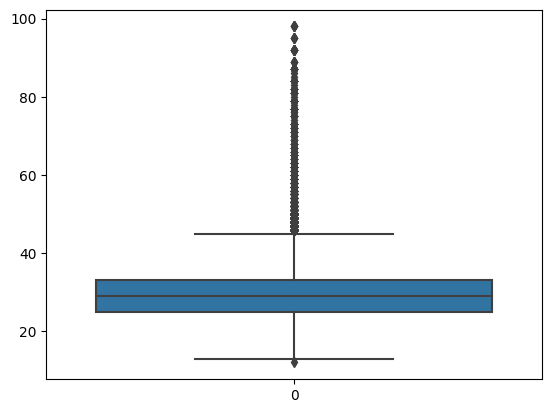

In [ ]:
sns.boxplot(df.BMI)

**Univariate Analysis**

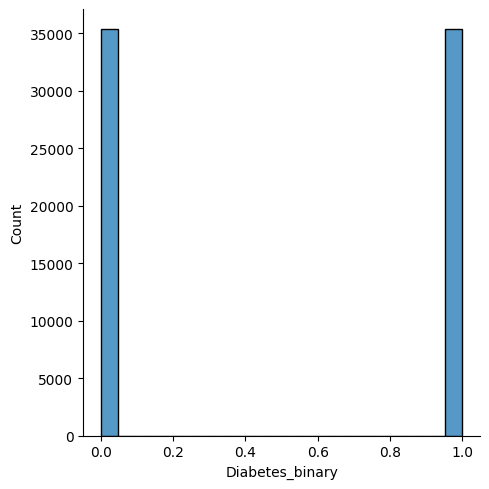

In [ ]:
sns.displot(df.Diabetes_binary)

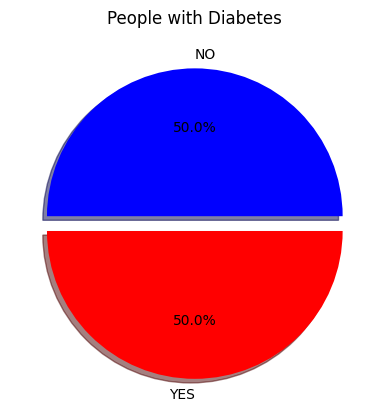

In [ ]:
plt.pie(df.Diabetes_binary.value_counts(),[0,0.1],labels = ['NO','YES'],autopct ='%1.1f%%',shadow = True,colors = ['BLUE','RED'],)
plt.title('People with Diabetes')
plt.show()

**Bivariate Analysis**

<Axes: xlabel='Diabetes_binary', ylabel='HighBP'>

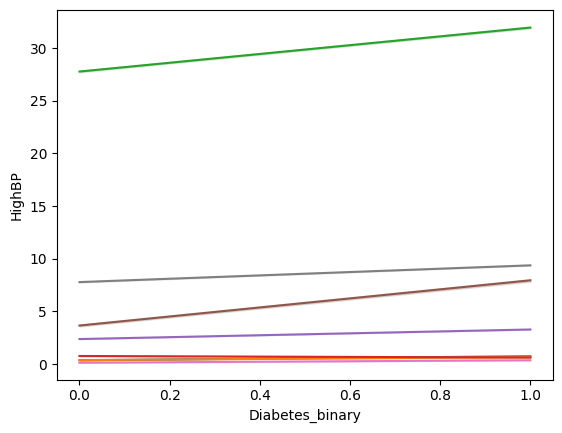

In [ ]:
sns.lineplot(x=df.Diabetes_binary,y=df.HighBP)
sns.lineplot(x=df.Diabetes_binary,y=df.HighChol)
sns.lineplot(x=df.Diabetes_binary,y=df.BMI)
sns.lineplot(x=df.Diabetes_binary,y=df.PhysActivity)
sns.lineplot(x=df.Diabetes_binary,y=df.GenHlth)
sns.lineplot(x=df.Diabetes_binary,y=df.PhysHlth)
sns.lineplot(x=df.Diabetes_binary,y=df.DiffWalk)
sns.lineplot(x=df.Diabetes_binary,y=df.Age)

<Axes: xlabel='Diabetes_binary', ylabel='HighBP'>

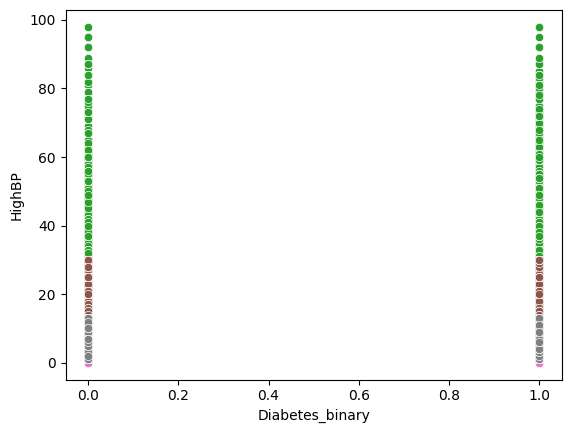

In [ ]:
sns.scatterplot(x=df.Diabetes_binary,y=df.HighBP)
sns.scatterplot(x=df.Diabetes_binary,y=df.HighChol)
sns.scatterplot(x=df.Diabetes_binary,y=df.BMI)
sns.scatterplot(x=df.Diabetes_binary,y=df.PhysActivity)
sns.scatterplot(x=df.Diabetes_binary,y=df.GenHlth)
sns.scatterplot(x=df.Diabetes_binary,y=df.PhysHlth)
sns.scatterplot(x=df.Diabetes_binary,y=df.DiffWalk)
sns.scatterplot(x=df.Diabetes_binary,y=df.Age)

**Multivariate Analysis**

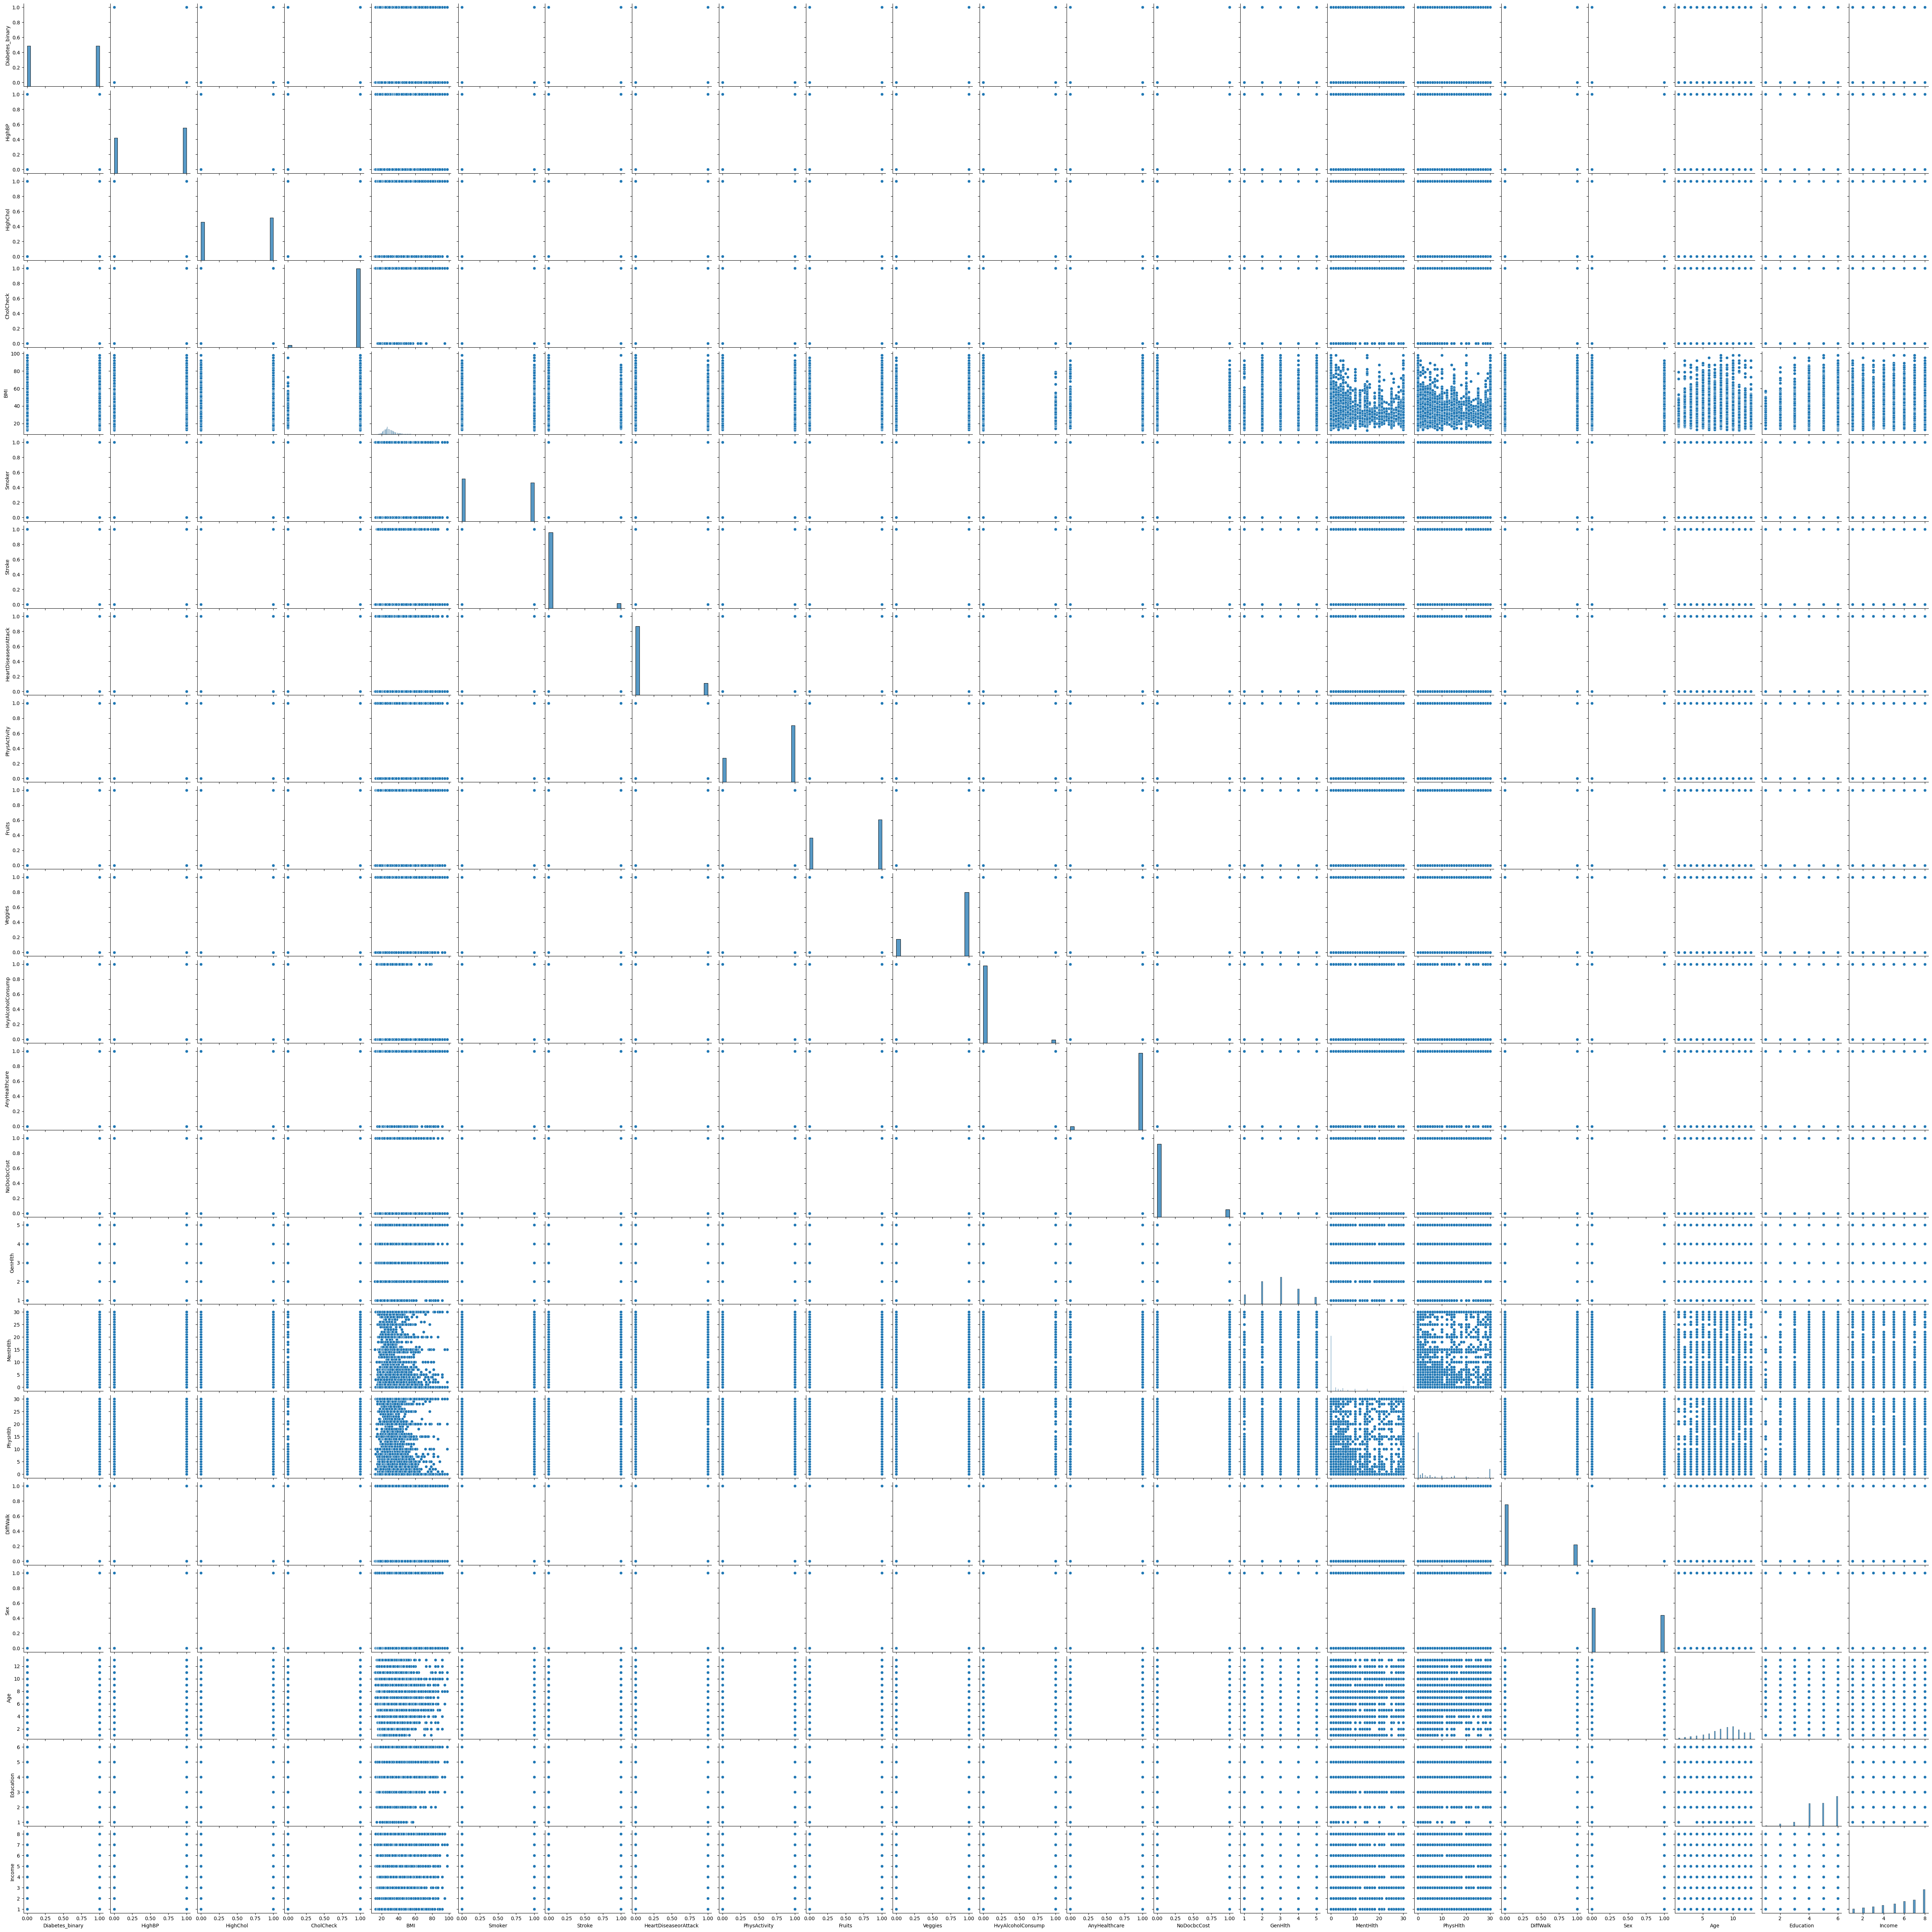

In [ ]:
sns.pairplot(df)

<Axes: >

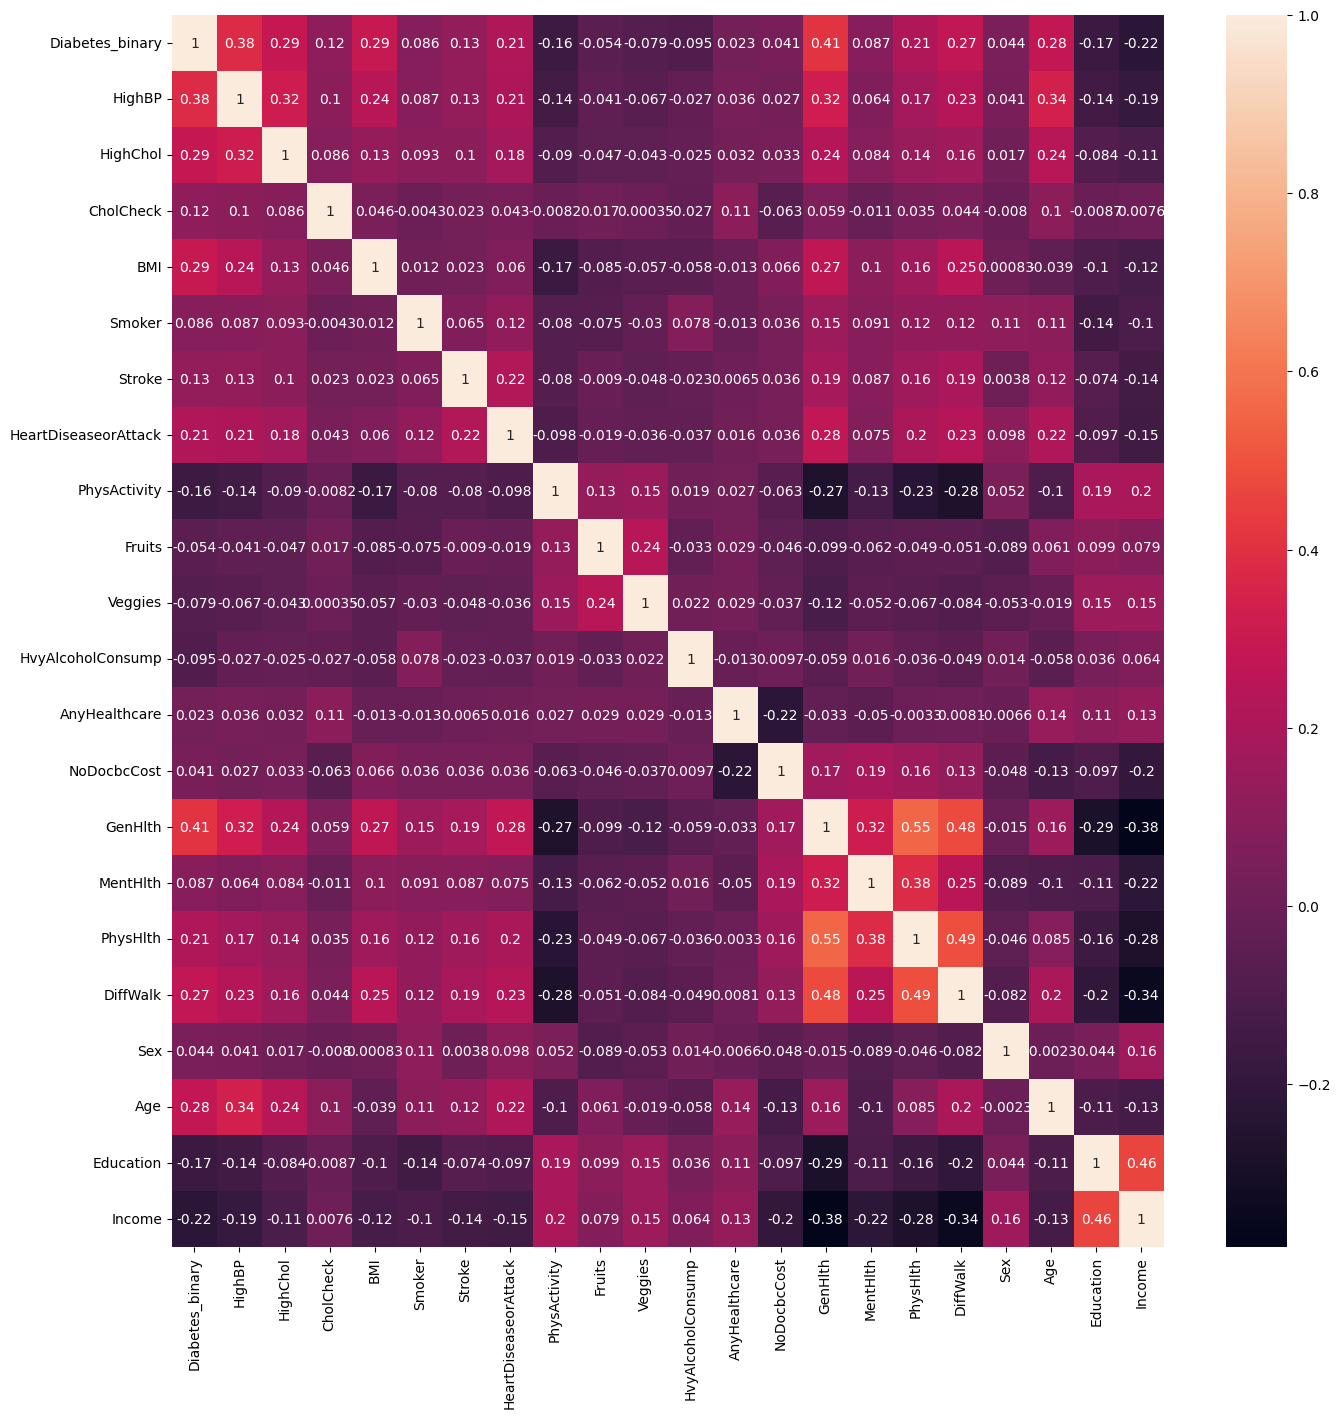

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True)

Making Training and Test Sets

In [4]:
Y=df['Diabetes_binary']
X=df.drop(columns=['Diabetes_binary'],axis=1)
print(X)
print(Y)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       0.0        1.0  26.0     0.0     0.0   
1         1.0       1.0        1.0  26.0     1.0     1.0   
2         0.0       0.0        1.0  26.0     0.0     0.0   
3         1.0       1.0        1.0  28.0     1.0     0.0   
4         0.0       0.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
70687     0.0       1.0        1.0  37.0     0.0     0.0   
70688     0.0       1.0        1.0  29.0     1.0     0.0   
70689     1.0       1.0        1.0  25.0     0.0     0.0   
70690     1.0       1.0        1.0  18.0     0.0     0.0   
70691     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     0.0      1.0  ...   
1                       0.0           0.0     1.0      0.0  ...   
2                       0.0           1.0     1.0      1.0  ...   
3          

In [5]:
sc=StandardScaler().fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)


X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.880201,-1.052798,0.159276,-0.542176,-0.951711,-0.257473,-0.416470,0.649925,-1.255371,0.517485,...,0.217175,-0.321945,0.146304,0.153020,2.404008,-0.581554,1.090046,-1.607237,1.048562,1.058160
1,0.880201,0.949850,0.159276,-0.542176,1.050740,3.883895,-0.416470,-1.538638,0.796577,-1.932424,...,0.217175,-0.321945,0.146304,-0.460058,-0.577451,-0.581554,1.090046,1.197681,1.048562,1.058160
2,-1.136104,-1.052798,0.159276,-0.542176,-0.951711,-0.257473,-0.416470,0.649925,0.796577,0.517485,...,0.217175,-0.321945,-1.649743,-0.460058,0.416369,-0.581554,1.090046,1.548296,1.048562,1.058160
3,0.880201,0.949850,0.159276,-0.261036,1.050740,-0.257473,-0.416470,0.649925,0.796577,0.517485,...,0.217175,-0.321945,0.146304,-0.460058,-0.279305,-0.581554,1.090046,0.847066,1.048562,1.058160
4,-1.136104,-1.052798,0.159276,-0.120466,1.050740,-0.257473,-0.416470,0.649925,0.796577,0.517485,...,0.217175,-0.321945,-0.751719,-0.460058,-0.577451,-0.581554,-0.917392,-0.204778,0.076814,1.058160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,-1.136104,0.949850,0.159276,1.004092,-0.951711,-0.257473,-0.416470,-1.538638,-1.255371,0.517485,...,0.217175,-0.321945,1.044328,-0.460058,-0.577451,-0.581554,-0.917392,-0.906008,-0.894934,-2.159964
70688,-1.136104,0.949850,0.159276,-0.120466,1.050740,-0.257473,2.401131,-1.538638,0.796577,0.517485,...,0.217175,-0.321945,-0.751719,-0.460058,-0.577451,1.719532,1.090046,0.496451,-1.866682,0.138696
70689,0.880201,0.949850,0.159276,-0.682745,-0.951711,-0.257473,2.401131,-1.538638,0.796577,-1.932424,...,0.217175,-0.321945,1.942351,1.379176,-0.577451,1.719532,-0.917392,1.548296,1.048562,-0.780768
70690,0.880201,0.949850,0.159276,-1.666734,-0.951711,-0.257473,-0.416470,-1.538638,-1.255371,-1.932424,...,0.217175,-0.321945,1.044328,-0.460058,-0.577451,1.719532,-0.917392,0.847066,-2.838430,-0.780768


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = 0, strategy='mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
x_test.shape,y_test.shape

((21208, 21), (21208,))

In [14]:
x_test

array([[ 0.88020109, -1.05279808,  0.15927581, ..., -0.20477824,
        -1.86668185, -0.32103587],
       [-1.13610402, -1.05279808,  0.15927581, ...,  0.49645134,
         0.07681388, -0.78076781],
       [-1.13610402, -1.05279808,  0.15927581, ..., -1.25662262,
         0.07681388,  1.05815996],
       ...,
       [-1.13610402,  0.94984976,  0.15927581, ..., -0.55539304,
         1.04856175,  1.05815996],
       [-1.13610402, -1.05279808,  0.15927581, ..., -0.90600783,
        -1.86668185, -2.15996364],
       [ 0.88020109, -1.05279808,  0.15927581, ...,  1.54829572,
        -0.89493398, -1.24049975]])

In [15]:
y_train



15796    0.0
11358    0.0
25283    0.0
542      0.0
25622    0.0
        ... 
21243    0.0
45891    1.0
42613    1.0
43567    1.0
68268    1.0
Name: Diabetes_binary, Length: 49484, dtype: float64

**Making Models**

Sequential Model using TensorFlow

In [16]:
model=Sequential()
model.add(Dense(30,input_dim=21,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
4949/4949 [==============================] - 16s 3ms/step - loss: 0.4964 - accuracy: 0.7573
Epoch 2/50
4949/4949 [==============================] - 12s 2ms/step - loss: 0.4959 - accuracy: 0.7570
Epoch 3/50
4949/4949 [==============================] - 10s 2ms/step - loss: 0.4950 - accuracy: 0.7595
Epoch 4/50
4949/4949 [==============================] - 10s 2ms/step - loss: 0.4945 - accuracy: 0.7588
Epoch 5/50
4949/4949 [==============================] - 10s 2ms/step - loss: 0.4940 - accuracy: 0.7595
Epoch 6/50
4949/4949 [==============================] - 11s 2ms/step - loss: 0.4935 - accuracy: 0.7596
Epoch 7/50
4949/4949 [==============================] - 11s 2ms/step - loss: 0.4935 - accuracy: 0.7587
Epoch 8/50
4949/4949 [==============================] - 12s 2ms/step - loss: 0.4928 - accuracy: 0.7594
Epoch 9/50
4949/4949 [==============================] - 11s 2ms/step - loss: 0.4927 - accuracy: 0.7605
Epoch 10/50
4949/4949 [==============================] - 10s 2ms/step - l

In [20]:
predictions = model.predict(x_test)
rounded = [round(x[0]) for x in predictions]
print(rounded)


663/663 [==============================] - 2s 2ms/step
[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

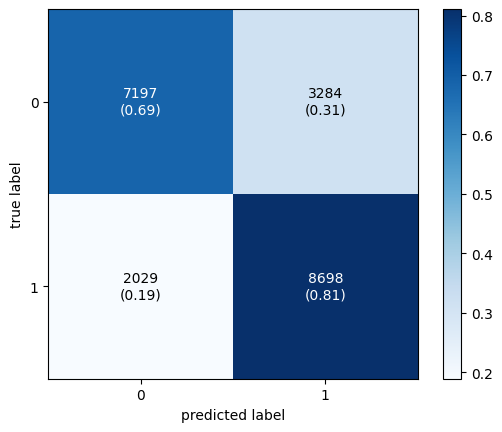

In [21]:

predicted = np.array(rounded)
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
plot_confusion_matrix(conf_mat=conf_mat, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

In [22]:
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1547/1547 [==============================] - 3s 2ms/step - loss: 0.4829 - accuracy: 0.7644

accuracy: 76.44%


In [23]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

663/663 [==============================] - 2s 2ms/step - loss: 0.5120 - accuracy: 0.7495

accuracy: 74.95%


Random Forest Classifier

In [24]:
rf=RandomForestClassifier(max_depth=100,n_estimators=50,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=50, random_state=0)

In [25]:
y_pred=rf.predict(x_test)
print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score (x_test, y_test)))

Training set score: 0.9952
Test set score: 0.7370


In [26]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.2629668049792531
Root Mean Squared Error: 0.5128028909622616


In [27]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73     10481
         1.0       0.73      0.77      0.75     10727

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



Hyperparameter Tuning

In [29]:

param_grid = { 'n_estimators': [25, 50, 100, 150], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9],  'max_leaf_nodes': [3, 6, 9]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)

In [43]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [44]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)

In [45]:
rf=RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)

In [46]:
y_pred=rf.predict(x_test)
print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score (x_test, y_test)))

Training set score: 0.7394
Test set score: 0.7427


In [47]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.2573085628064881
Root Mean Squared Error: 0.5072559145110958


In [48]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     10481
         1.0       0.73      0.78      0.75     10727

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



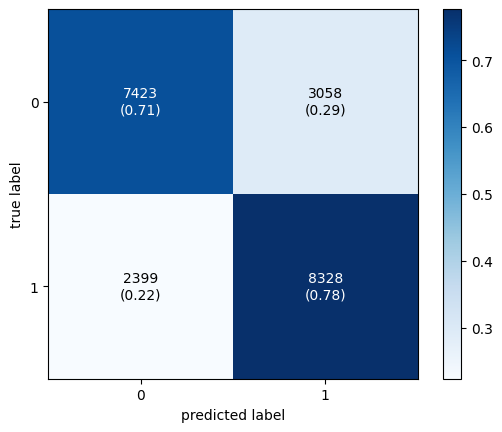

In [49]:
cr1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cr1, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

Decision Tree Classifier

In [50]:
dt=DecisionTreeClassifier(max_depth=12)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [51]:
y_pred=dt.predict(x_test)
print('Training set score: {:.4f}'.format(dt.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score (x_test, y_test)))

Training set score: 0.7997
Test set score: 0.7226


In [52]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.27739532251980387
Root Mean Squared Error: 0.5266833228039444


In [53]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71     10481
         1.0       0.71      0.76      0.74     10727

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



Hyperparameter Tuning

In [54]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
grid = GridSearchCV(estimator=DecisionTreeClassifier(),
                    param_grid=params)


In [55]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]})

In [56]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=8)

In [57]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=8)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=8)

In [58]:
y_pred=dt.predict(x_test)
print('Training set score: {:.4f}'.format(dt.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score (x_test, y_test)))

Training set score: 0.7461
Test set score: 0.7376


In [59]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.262448132780083
Root Mean Squared Error: 0.5122969185736754


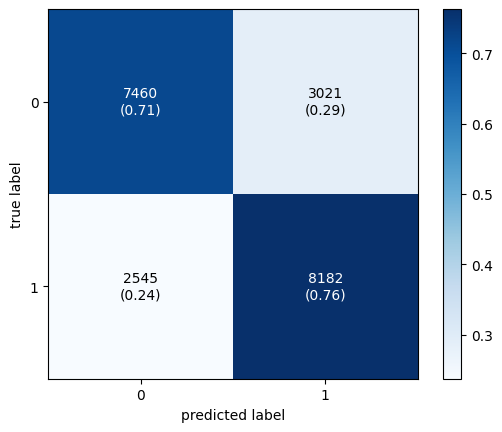

In [60]:
cr1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cr1, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

Logistic Regression

In [61]:
lg=LogisticRegression(max_iter=1500)
lg.fit(x_train,y_train)

LogisticRegression(max_iter=1500)

In [62]:
y_pred=lg.predict(x_test)

print('Training set score: {:.4f}'.format(lg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(lg.score (x_test, y_test)))


Training set score: 0.7479
Test set score: 0.7491


In [63]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.2508958883440211
Root Mean Squared Error: 0.5008950871629918


In [64]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10481
         1.0       0.74      0.77      0.76     10727

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



Hyperparameter Tuning

In [67]:
grid={'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000,7500,10000,15000]
    }
logreg_cv=GridSearchCV(LogisticRegression(),grid,cv=10)


In [69]:
logreg_cv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
11200 fits failed out of a total of 21000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000, 7500, 10000,
                                      15000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [71]:
logreg_cv.best_estimator_

LogisticRegression(C=0.004832930238571752)

In [74]:
lg=LogisticRegression(C=0.004832930238571752)
lg.fit(x_train,y_train)

LogisticRegression(C=0.004832930238571752)

In [75]:
y_pred=lg.predict(x_test)
print('Training set score: {:.4f}'.format(lg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(lg.score (x_test, y_test)))

Training set score: 0.7476
Test set score: 0.7502


In [76]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.24976423990946814
Root Mean Squared Error: 0.49976418430042396


In [77]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10481
         1.0       0.74      0.77      0.76     10727

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



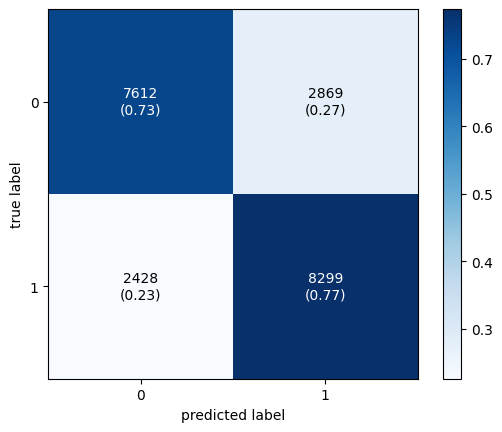

In [78]:
cr1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cr1, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

Support Vector Classification

In [79]:
from sklearn.svm import SVC
clf = SVC (kernel='rbf', C=1.0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [80]:
y_pred=lg.predict(x_test)
print('Training set score: {:.4f}'.format(clf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score (x_test, y_test)))

Training set score: 0.7661
Test set score: 0.7547


In [81]:
mse =mean_squared_error(y_test, y_pred)
print('Mean Squared Error: '+ str(mse))
rmse =(mean_squared_error(y_test, y_pred))**(0.5)
print('Root Mean Squared Error: '+ str(rmse))

Mean Squared Error: 0.24976423990946814
Root Mean Squared Error: 0.49976418430042396


In [82]:
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10481
         1.0       0.74      0.77      0.76     10727

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



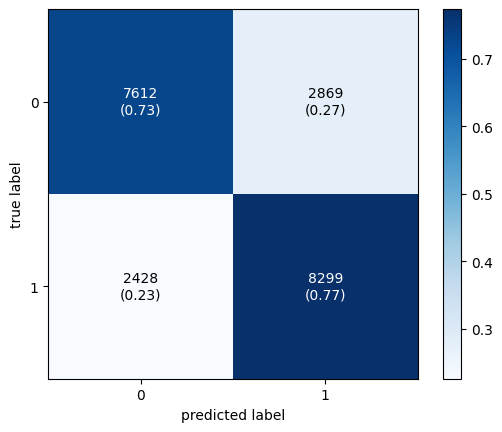

In [83]:
cr1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cr1, show_absolute=True,
show_normed=True, colorbar=True)
plt.show()

Creating Pipelines

In [84]:

pipeline_lr=Pipeline([('scalar1',StandardScaler()),('pca1',PCA(n_components=2)),('1r_classifier', LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),('pca2',PCA(n_components=2)),('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest=Pipeline([('scalar3', StandardScaler()),('pca3',PCA(n_components=2)),('rf_classifier',RandomForestClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]
best_accuracy=0.0
best_classifier=8
best_pipeline=""

pipe_dict={0:'Logistic Regression',1:'Decision Tree',2:'RandomForest'}
for pipe in pipelines:
 pipe.fit(x_train, y_train)
for i,model in enumerate (pipelines):
 print("{} Test Accuracy: {}".format(pipe_dict[i],model.score (x_test,y_test)))


Logistic Regression Test Accuracy: 0.7295831761599396
Decision Tree Test Accuracy: 0.6455111278762731
RandomForest Test Accuracy: 0.6919558657110524


In [85]:

from sklearn.pipeline import make_pipeline
pipe = make_pipeline ((RandomForestClassifier()))
grid_param = [
{"randomforestclassifier": [RandomForestClassifier()], "randomforestclassifier__n_estimators": [10, 100, 1000], "randomforestclassifier___max_depth": [5,8,15,25,30,None],
"randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
"randomforestclassifier___max_leaf_nodes": [2, 5,10]}]
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1)
print(lg.score (x_test,y_test),dt.score(x_test,y_test),rf.score(x_test,y_test))

0.7502357600905318 0.7375518672199171 0.7426914371935118


Making the Pickle File

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [87]:

import pickle
with open("drive/MyDrive/Diabetes_Predict4.pickle","wb") as file:
 pickle.dump(lg,file)
